In [4]:
import pandas as pd

In [13]:
sales_df = pd.read_csv("./dataset/advertising_and_sales_clean.csv")
sales_df.sample(5)

,tv,radio,social_media,influencer,sales
343,17000.0,8482.70,946.15,Nano,58925.32
904,21000.0,3108.36,1361.97,Mega,73428.38
4171,83000.0,33363.04,2612.16,Mega,300045.85
2566,27000.0,8827.91,3775.34,Nano,93185.85
1787,11000.0,460.92,258.23,Micro,38216.40


In [14]:
sales_df.dtypes

tv              float64
radio           float64
social_media    float64
influencer       object
sales           float64
dtype: object

In [16]:
sales_df.drop('influencer', axis=1, inplace=True)

### Creating features

In [17]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model

In [18]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


Great model building! See how sales values for the first five predictions range from `$95,000` to over `$290,000`. Let's visualize the model's fit.

### Visualizing a linear regression model

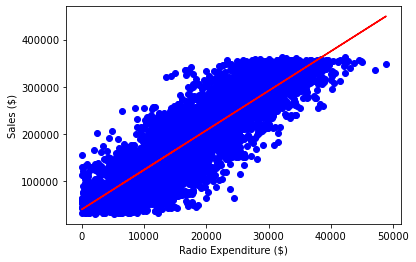

In [19]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### Fit and predict for regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


### Regression performance

In [21]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


### Cross-validation for R-squared

In [22]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


### Analyzing cross-validation metrics

In [25]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


### Regularized regression: Ridge
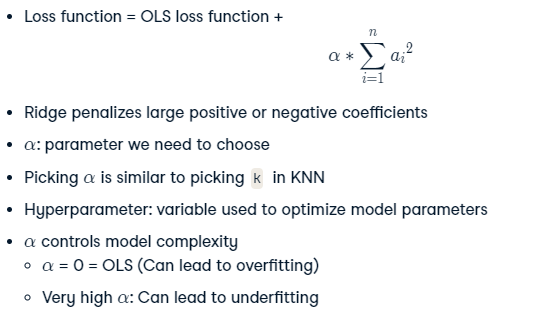

In [26]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    # Create a Ridge regression model
    ridge = Ridge(alpha = alpha)
  
    # Fit the data
    ridge.fit(X_train, y_train)
  
    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
    
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


### Lasso Regression
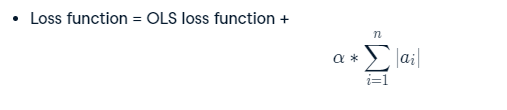
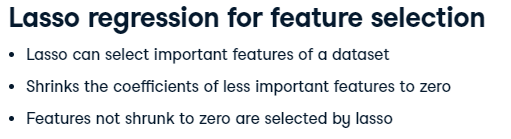
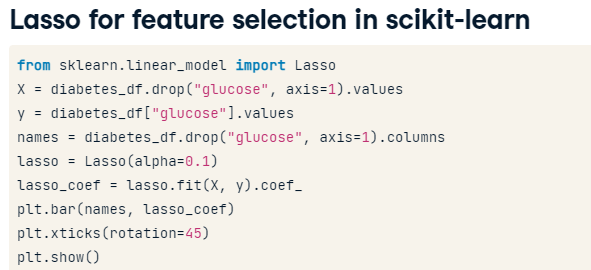

[ 3.56256962 -0.00397035  0.00496385]
['tv', 'radio', 'social_media']


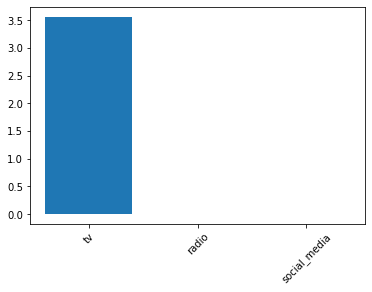

In [33]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

sales_columns = ['tv', 'radio', 'social_media']
print(sales_columns)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()